Correlation with Immatrikulation:
Immatrikulation                                                                                                              1.000000
Teilnahme an InfoVeranstaltung                                                                                               0.588006
Angaben zum vorherigen Studium Digital Business Engineering - Durchschnittsnote des qualifizierenden Hochschulabschlusses    0.177351
Note der HZB                                                                                                                 0.114663
PLZ                                                                                                                          0.059392
Entfernung_zur_71034                                                                                                        -0.106892
Name: Immatrikulation, dtype: float64


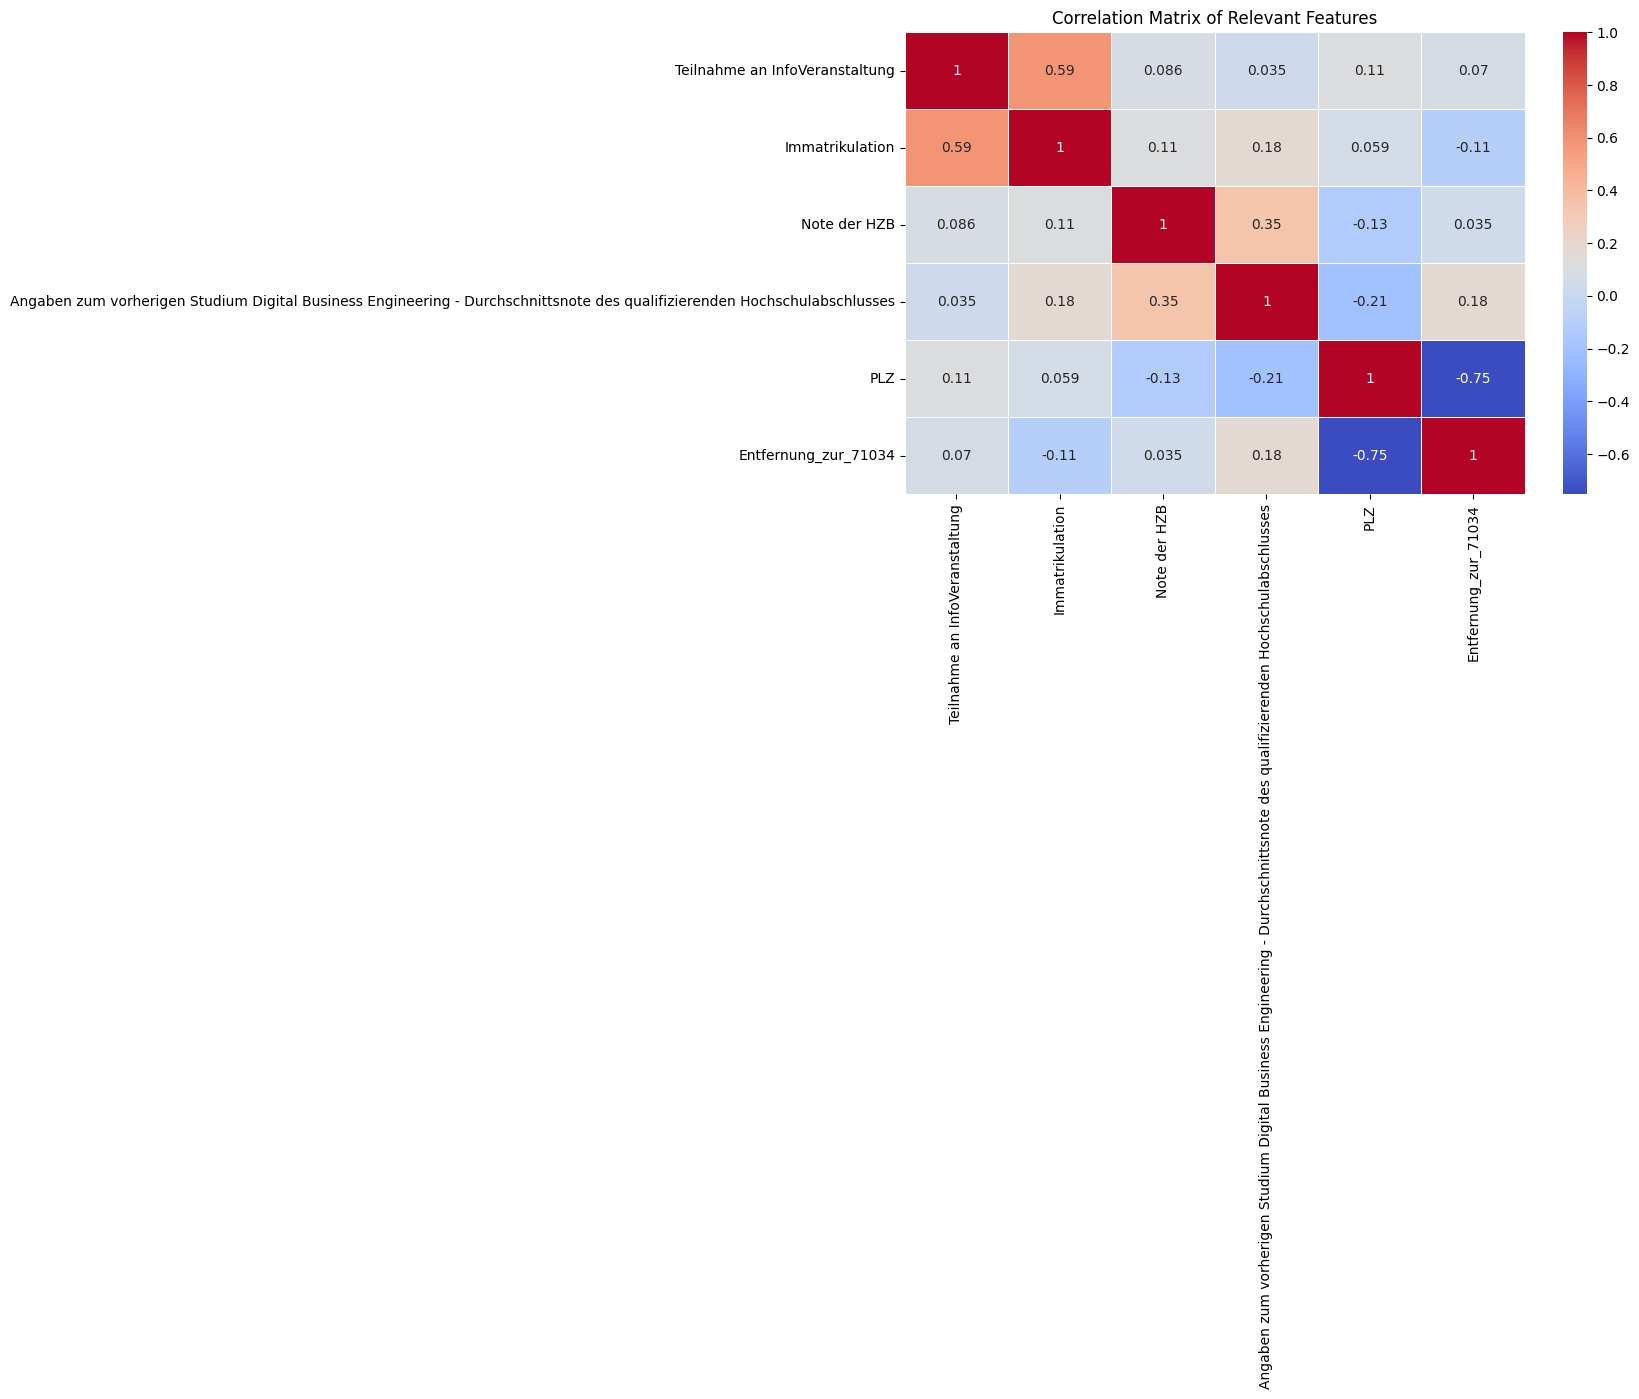

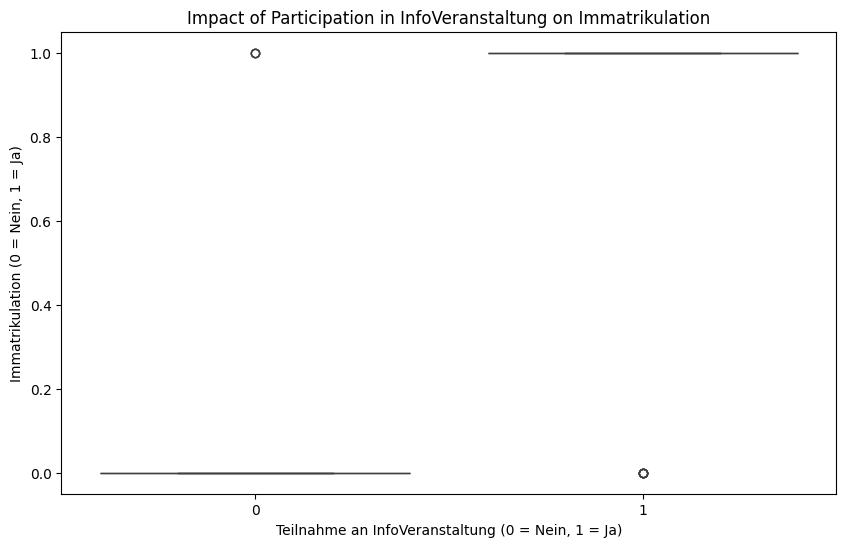

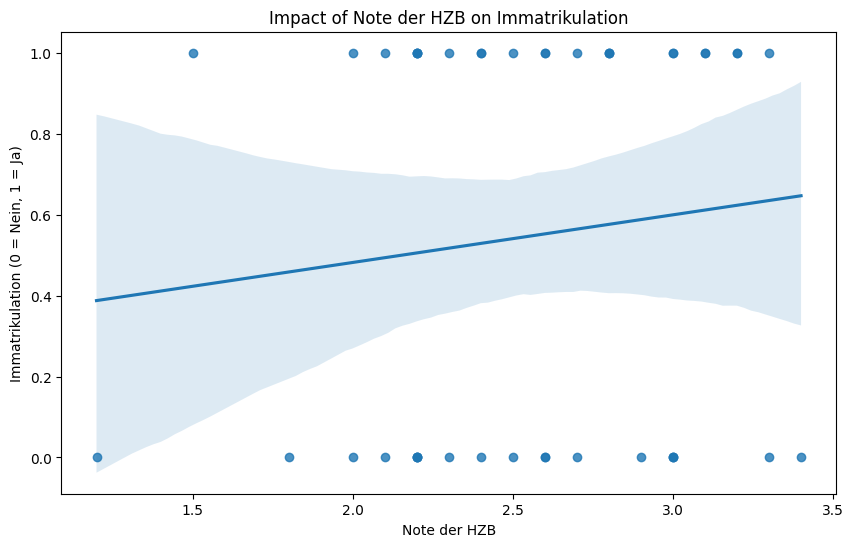

<Figure size 1000x600 with 0 Axes>

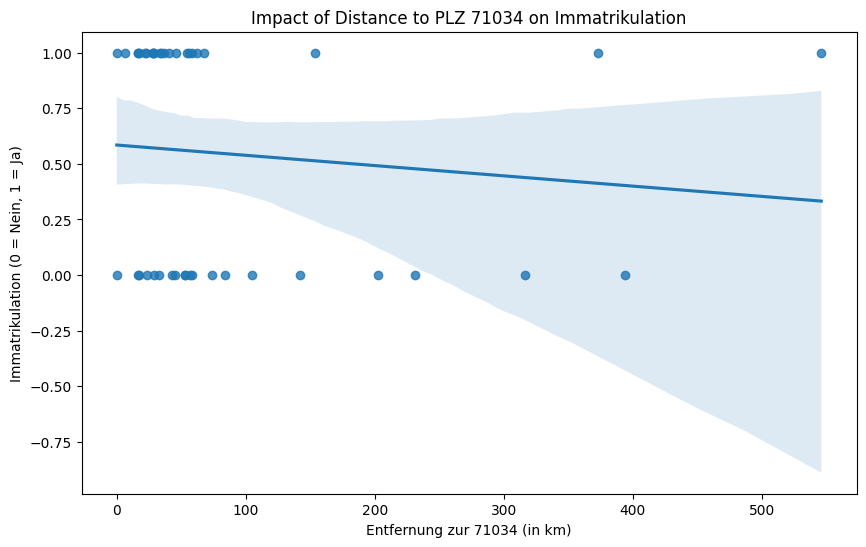

In [12]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import geopy

# Loading the data
file_path_1 = r'C:\git\PO\Bewerber_WS2023.xlsx'
data_ws2023 = pd.read_excel(file_path_1)

# Selecting relevant columns for the analysis
relevant_columns = [
    'Teilnahme an InfoVeranstaltung',
    'Immatrikulation',
    'Note der HZB',
    'Angaben zum vorherigen Studium Digital Business Engineering - Durchschnittsnote des qualifizierenden Hochschulabschlusses',
    'Angaben zum vorherigen Studium Digital Business Engineering - Anzahl ECTS-CP des qualifizierenden Hochschulabschlusses',
    'PLZ'
]

# Check if all relevant columns exist in the DataFrame
existing_columns = [col for col in relevant_columns if col in data_ws2023.columns]

subset_data_ws2023 = data_ws2023[existing_columns]

# Cleaning and preparing data: handling missing values, converting to numerical types where necessary
subset_data_ws2023_cleaned = subset_data_ws2023.copy()
subset_data_ws2023_cleaned['Teilnahme an InfoVeranstaltung'] = subset_data_ws2023_cleaned['Teilnahme an InfoVeranstaltung'].notna().astype(int)
subset_data_ws2023_cleaned['Immatrikulation'] = subset_data_ws2023_cleaned['Immatrikulation'].apply(lambda x: 1 if x == 'Ja' else 0)

# Converting other numerical columns to float
for col in ['Note der HZB', 'Angaben zum vorherigen Studium Digital Business Engineering - Durchschnittsnote des qualifizierenden Hochschulabschlusses',
        'Angaben zum vorherigen Studium Digital Business Engineering - Anzahl ECTS-CP des qualifizierenden Hochschulabschlusses']:
    if col in subset_data_ws2023_cleaned.columns:
        subset_data_ws2023_cleaned[col] = pd.to_numeric(subset_data_ws2023_cleaned[col], errors='coerce')

# Dropping rows with missing values after conversion
subset_data_ws2023_cleaned.dropna(inplace=True)

# Adding distance calculation to a target postal code (71034)
locator = geopy.Nominatim(user_agent="distance_calculator")
target_location = locator.geocode("71034, Germany")

def calculate_distance(plz):
    try:
        location = locator.geocode(f"{plz}, Germany")
        if location:
            return geodesic((location.latitude, location.longitude), (target_location.latitude, target_location.longitude)).km
        else:
            return None
    except:
        return None

subset_data_ws2023_cleaned['Entfernung_zur_71034'] = subset_data_ws2023_cleaned['PLZ'].apply(calculate_distance)

# Correlation analysis to see which variables are associated with 'Immatrikulation'
correlation_matrix = subset_data_ws2023_cleaned.corr()

# Extracting correlation with 'Immatrikulation'
correlation_with_immatriculation = correlation_matrix['Immatrikulation'].sort_values(ascending=False)

# Displaying the correlation values
print("Correlation with Immatrikulation:")
print(correlation_with_immatriculation)

# Visualizing the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Relevant Features')
plt.show()

# Plotting individual relationships
plt.figure(figsize=(10, 6))
sns.boxplot(x='Teilnahme an InfoVeranstaltung', y='Immatrikulation', data=subset_data_ws2023_cleaned)
plt.title('Impact of Participation in InfoVeranstaltung on Immatrikulation')
plt.xlabel('Teilnahme an InfoVeranstaltung (0 = Nein, 1 = Ja)')
plt.ylabel('Immatrikulation (0 = Nein, 1 = Ja)')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Note der HZB', y='Immatrikulation', data=subset_data_ws2023_cleaned, logistic=False)
plt.title('Impact of Note der HZB on Immatrikulation')
plt.xlabel('Note der HZB')
plt.ylabel('Immatrikulation (0 = Nein, 1 = Ja)')
plt.show()

plt.figure(figsize=(10, 6))
# Correcting the column name if necessary
correct_column_name = 'Angaben zum vorherigen Studium Digital Business Engineering - Anzahl ECTS-CP des qualifizierenden Hochschulabschlusses'
if correct_column_name in subset_data_ws2023_cleaned.columns:
    sns.regplot(x=correct_column_name, y='Immatrikulation', data=subset_data_ws2023_cleaned, logistic=False)
    plt.title('Impact of Anzahl ECTS-CP on Immatrikulation')
    plt.xlabel('Anzahl ECTS-CP des qualifizierenden Hochschulabschlusses')
    plt.ylabel('Immatrikulation (0 = Nein, 1 = Ja)')
    plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Entfernung_zur_71034', y='Immatrikulation', data=subset_data_ws2023_cleaned, logistic=False)
plt.title('Impact of Distance to PLZ 71034 on Immatrikulation')
plt.xlabel('Entfernung zur 71034 (in km)')
plt.ylabel('Immatrikulation (0 = Nein, 1 = Ja)')
plt.show()